<a href="https://colab.research.google.com/github/viyas52/diabetes-prediction/blob/main/DiabeticPrediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv('/content/diabetes_prediction_dataset.csv',encoding="utf-8")

In [5]:
df.shape

(100000, 9)

In [6]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [8]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [9]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [10]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [11]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [12]:
le = LabelEncoder()
print(le)

LabelEncoder()


In [13]:
df['gender'] = le.fit_transform(df['gender'])

In [14]:
df['gender'].unique()

array([0, 1, 2])

In [15]:
df['smoking_history'] = le.fit_transform(df['smoking_history'])

In [16]:
df['smoking_history'].unique()

array([4, 0, 1, 3, 2, 5])

In [17]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


In [18]:
correlation = df.corr()

<Axes: >

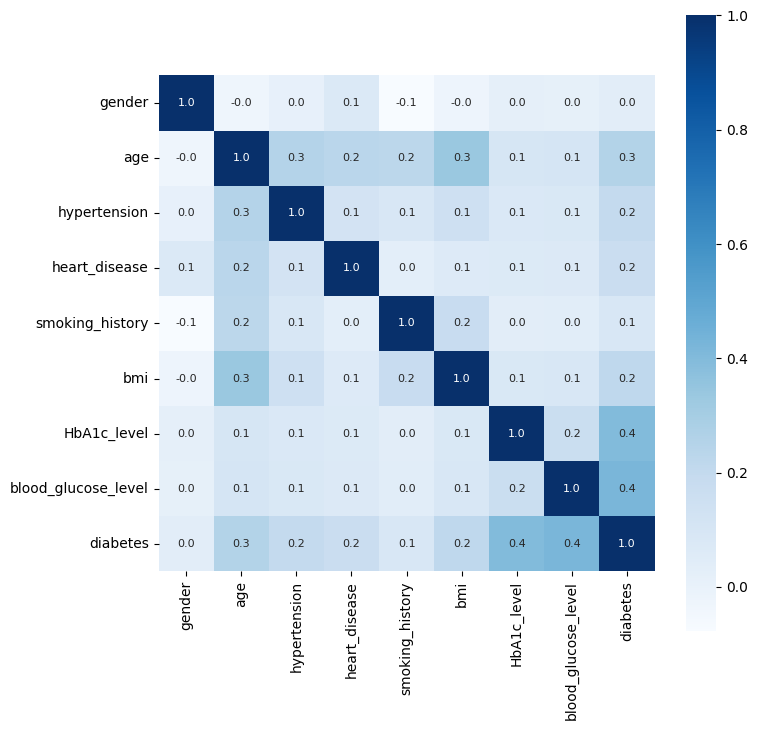

In [19]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar='True', square='True', fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [20]:
X = df.drop('diabetes',axis=1)

In [21]:
print(X)

       gender   age  hypertension  heart_disease  smoking_history    bmi  \
0           0  80.0             0              1                4  25.19   
1           0  54.0             0              0                0  27.32   
2           1  28.0             0              0                4  27.32   
3           0  36.0             0              0                1  23.45   
4           1  76.0             1              1                1  20.14   
...       ...   ...           ...            ...              ...    ...   
99995       0  80.0             0              0                0  27.32   
99996       0   2.0             0              0                0  17.37   
99997       1  66.0             0              0                3  27.83   
99998       0  24.0             0              0                4  35.42   
99999       0  57.0             0              0                1  22.43   

       HbA1c_level  blood_glucose_level  
0              6.6                  140  
1  

In [22]:
Y = df['diabetes']

In [23]:
print(Y)

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 19)

In [25]:
print(Y.shape, Y_train.shape, Y_test.shape)

(100000,) (80000,) (20000,)


In [26]:
model = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.05, n_jobs=4)
model.fit(X_train, Y_train, early_stopping_rounds=5,eval_set=[(X_test, Y_test)])

[0]	validation_0-logloss:0.29256
[1]	validation_0-logloss:0.27520
[2]	validation_0-logloss:0.26055
[3]	validation_0-logloss:0.24782
[4]	validation_0-logloss:0.23651


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-logloss:0.22635
[6]	validation_0-logloss:0.21716
[7]	validation_0-logloss:0.20877
[8]	validation_0-logloss:0.20106
[9]	validation_0-logloss:0.19393
[10]	validation_0-logloss:0.18733
[11]	validation_0-logloss:0.18121
[12]	validation_0-logloss:0.17548
[13]	validation_0-logloss:0.17014
[14]	validation_0-logloss:0.16516
[15]	validation_0-logloss:0.16048
[16]	validation_0-logloss:0.15609
[17]	validation_0-logloss:0.15199
[18]	validation_0-logloss:0.14813
[19]	validation_0-logloss:0.14451
[20]	validation_0-logloss:0.14108
[21]	validation_0-logloss:0.13786
[22]	validation_0-logloss:0.13483
[23]	validation_0-logloss:0.13196
[24]	validation_0-logloss:0.12927
[25]	validation_0-logloss:0.12675
[26]	validation_0-logloss:0.12433
[27]	validation_0-logloss:0.12206
[28]	validation_0-logloss:0.11990
[29]	validation_0-logloss:0.11785
[30]	validation_0-logloss:0.11591
[31]	validation_0-logloss:0.11407
[32]	validation_0-logloss:0.11233
[33]	validation_0-logloss:0.11068
[34]	validation_0-l

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=4,
              num_parallel_tree=None, random_state=None, ...)

In [27]:
y_predict = model.predict(X_test)
print(f"Accuracy of this model : {accuracy_score(Y_test, y_predict) * 100}")

Accuracy of this model : 97.41


In [28]:
# Building Prediction System
input_data = (1,67,0,1,5,27,6.5,200)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction == 1):
  print("Diabetic Patient")
else:
  print("Not a diabetic Patient")

[0]
Not a diabetic Patient


In [29]:
import pickle

In [30]:
filename ='diap.sav'
pickle.dump(model,open(filename,'wb'))
lmodel=pickle.load(open('diap.sav','rb'))